In [1]:
import pandas as pd
import numpy as np
import random as rand
import math
from tqdm import tqdm
from more_itertools import sort_together 
from statistics import mean 

from itertools import *

import random

import time

import matplotlib.pyplot as plt

In [2]:
from matplotlib import pyplot as plt

# SOMA

In [3]:
class Soma:
    
    def __init__(self, func):
        self.f = func
        
    # population creation (создание популяции)
    def pop_create(self, pop_size, num_of_x, a, b):
        pop = np.empty((num_of_x, pop_size))
        for j in range(pop_size):
            for i in range(num_of_x):
                pop[i][j] = a[i] + random.random() * (b[i] - a[i])
        return pop


    # sorting by cost function (сортировка по функции присособленности)
    def cost_function_sort(self, pop, pop_size, num_of_x):
        newpop = np.empty((num_of_x, pop_size))
        cost = {}
        for j in range(pop_size):
            cost[j] = self.f(pop[:, j])
        list_cost = list(cost.items())
        list_cost.sort(key=lambda i: i[1])
        for j in range(pop_size):
            newpop[:, j] = pop[:, list_cost[j][0]]
        return newpop


    # creating a PRT vector (создание вектора PRT)
    def create_prt_vector(self, prt, pop_size, num_of_x):
        prt_vector = np.zeros((num_of_x, pop_size))
        for j in range(pop_size):
            for i in range(num_of_x):
                if random.random() < prt:
                    prt_vector[i][j] = 1
        return prt_vector


    # movement of individuals towards leaders
    def movement(self, pop_size, prt, num_of_x, NStep, new_pop, a, b):

        vector_of_steps = np.zeros((num_of_x, NStep))

        PRT = self.create_prt_vector(prt, pop_size, num_of_x)

        # movement to the first leader
        for i in range(pop_size):
            for s in range(NStep):
                vector_of_steps[:, s] = new_pop[:, i] + ((new_pop[:, 0] - new_pop[:, i])/(NStep//2)) * (PRT[:, i])*s
            new_pop[:, i] = self.cost_function_sort(vector_of_steps, NStep, num_of_x)[:, 0]

        # catching value out of range
        for j in range(pop_size):
            for i in range(num_of_x):
                if new_pop[i][j] < a[i]:
                    new_pop[i][j] = a[i]
                if new_pop[i][j] > b[i]:
                    new_pop[i][j] = b[i]
        return new_pop




    # SOMA function
    def find_min(self
                 , pop_size = 100
                 , num_of_x = 2
                 , a = [-100, -100]
                 , b = [100, 100]
                 , NStep = 10
                 , prt = 0.4
                 , Migrations = 20
                 , MinDist = 0.0001):
        start_time = time.time()

        pop = self.pop_create(pop_size, num_of_x, a, b)

        new_pop = self.cost_function_sort(pop, pop_size, num_of_x)


        MCount = 0
        # migration loop
        pbar = tqdm(total=Migrations)
        while MCount < Migrations and abs(self.f(new_pop[0]) - self.f(new_pop[-1])) >= MinDist:
            new_pop = self.movement(pop_size, prt, num_of_x, NStep, new_pop, a, b)
            new_pop = self.cost_function_sort(new_pop, pop_size, num_of_x)

            MCount += 1
            pbar.update(1)
        pbar.close()
        
        return new_pop[:, 0], self.f(new_pop[:, 0]), MCount, time.time() - start_time

        

# MSOMA

In [4]:
class Msoma:
    
    def __init__(self, func):
        self.f = func
        
    # population creation (создание популяции)
    def pop_create(self, pop_size, num_of_x, a, b):
        pop = np.empty((num_of_x, pop_size))
        for j in range(pop_size):
            for i in range(num_of_x):
                pop[i][j] = a[i] + random.random() * (b[i] - a[i])
        return pop


    # sorting by cost function (сортировка по функции присособленности)
    def cost_function_sort(self, pop, pop_size, num_of_x):
        newpop = np.empty((num_of_x, pop_size))
        cost = {}
        for j in range(pop_size):
            cost[j] = self.f(pop[:, j])
        list_cost = list(cost.items())
        list_cost.sort(key=lambda i: i[1])
        for j in range(pop_size):
            newpop[:, j] = pop[:, list_cost[j][0]]
        return newpop


    # creating a PRT vector (создание вектора PRT)
    def create_prt_vector(self, prt, pop_size, num_of_x):
        prt_vector = np.zeros((num_of_x, pop_size))
        for j in range(pop_size):
            for i in range(num_of_x):
                if random.random() < prt:
                    prt_vector[i][j] = 1
        return prt_vector


    # movement of individuals towards leaders
    def movement(self, pop_size, prt, num_of_x, NStep, new_pop, a, b):

        vector_of_steps_1 = np.zeros((num_of_x, NStep * 4))
        vector_of_steps_2 = np.zeros((num_of_x, NStep * 2))
        vector_of_steps_3 = np.zeros((num_of_x, NStep))

        PRT = self.create_prt_vector(prt, pop_size * 3, num_of_x)

        # movement to the first leader
        for i in range(pop_size):
            for s in range(4 * NStep):
                vector_of_steps_1[:, s] = new_pop[:, i] + ((new_pop[:, 0] - new_pop[:, i])/(2*NStep)) * (PRT[:, i])*s
            new_pop[:, i] = self.cost_function_sort(vector_of_steps_1, 4 * NStep, num_of_x)[:, 0]

        # movement to the second leader
        for i in range(pop_size, pop_size * 2):
            for s in range(2 * NStep):
                vector_of_steps_2[:, s] = new_pop[:, i] + ((new_pop[:, pop_size+1] - new_pop[:, i])/NStep) * (PRT[:, i])*s
            new_pop[:, i] = self.cost_function_sort(vector_of_steps_2, 2 * NStep, num_of_x)[:, 0]

        # movement to the third leader
        for i in range(pop_size * 2, pop_size * 3):
            for s in range(NStep):
                vector_of_steps_3[:, s] = new_pop[:, i] + ((new_pop[:, 2*pop_size+2] - new_pop[:, i])/(NStep/2)) * (PRT[:, i])*s
            new_pop[:, i] = self.cost_function_sort(vector_of_steps_3, NStep, num_of_x)[:, 0]

        # catching value out of range
        for j in range(pop_size):
            for i in range(num_of_x):
                if new_pop[i][j] < a[i]:
                    new_pop[i][j] = a[i]
                if new_pop[i][j] > b[i]:
                    new_pop[i][j] = b[i]
        return new_pop


    # refinement function (функция уточнения)
    def elaboration(self, pop, NStep, prt, num_of_x):
        NStep *= 10
        PRT = self.create_prt_vector(prt, 3, num_of_x)
        vector_of_steps = np.zeros((num_of_x, NStep))
        ans = np.zeros((num_of_x, 3))
        for i in range(3):
            for s in range(NStep):
                vector_of_steps[:, s] = pop[:, i] + ((pop[:, 0] - pop[:, i])/(NStep/2)) * (PRT[:, i])*s
            ans[:, i] = self.cost_function_sort(vector_of_steps, NStep, num_of_x)[:, 0]
        ans = self.cost_function_sort(ans, 3, num_of_x)
        return ans[:, 0]


    # MSOMA find min
    def find_min(self
                 , pop_size = 100
                 , num_of_x = 2
                 , a = [-100, -100]
                 , b = [100, 100]
                 , NStep = 20
                 , prt = 0.3
                 , Migrations = 25
                 , MinDist = 0.1**10):
        start_time = time.time()

        pop = self.pop_create(pop_size, num_of_x, a, b)
        new_pop = self.cost_function_sort(pop, pop_size, num_of_x)

        # cloning
        new1_pop = np.concatenate((new_pop, new_pop), axis=1)
        new_pop = np.concatenate((new1_pop, new_pop), axis=1)

        MCount = 0
        # migration loop
        pbar = tqdm(total=Migrations)
        
        while MCount < Migrations and math.sqrt((1/2) * ((self.f(new_pop[:, 1]) - self.f(new_pop[:, 0]))**2 + (self.f(new_pop[:, 2]) - self.f(new_pop[:, 0]))**2)) >= MinDist:
            new_pop = self.movement(pop_size, prt, num_of_x, NStep, new_pop, a, b)
            new_pop = self.cost_function_sort(new_pop, 3 * pop_size, num_of_x)

            # population refreshing
            new_pop = new_pop[:, :round(pop_size*(2/3))]
            new_pop = np.concatenate((new_pop, self.pop_create(round(pop_size*(1/3)), num_of_x, a, b)), axis=1)
            new_pop = self.cost_function_sort(new_pop, pop_size, num_of_x)

            # cloning
            new1_pop = np.concatenate((new_pop, new_pop), axis=1)
            new_pop = np.concatenate((new1_pop, new_pop), axis=1)

            MCount += 1
            pbar.update(1)
            
        pbar.close()
        last_pop = new_pop[:, :3]

        ans = self.elaboration(last_pop, NStep, prt, num_of_x)

        return ans, self.f(ans), MCount, time.time() - start_time
    

# Classic task

## ex1 (50 dots)

In [4]:
def model(t, x, u):
    return x[t] + u[t]

In [5]:
def f(u):
    x = [0]       
    sumU = 0
    for t in range(N):
        x.append(model(t, x, u))
        sumU += (1.1**(-t)) * (u[t]**2)
    return 0.5*(sumU) + x[N]

In [16]:
def f_x(u):
    x = [0]       
    sumU = 0
    for t in range(N-1):
        x.append(model(t, x, u))
        sumU += (1.1**(-t)) * (u[t]**2)
    return x

In [7]:
N = 50

In [20]:
# setting paarameters
pop_size = 1000
num_of_x = 50
prt = 0.3
NStep = 100
Migrations = 70
MinDist = 0.001
a = [-110]*50
b = [0]*50

soma = Soma(f)
x, f_x, loop, time_run = soma.find_min(pop_size = pop_size,
                                       num_of_x = num_of_x,
                                       a = a,
                                       b = b,
                                       NStep = NStep,
                                       prt = prt,
                                       Migrations = Migrations,
                                       MinDist = MinDist)



# msoma = Msoma(f)
# u, I, iterac, t = msoma.find_min(pop_size = pop_size,
#                                        num_of_x = num_of_x,
#                                        a = a,
#                                        b = b,
#                                        NStep = NStep,
#                                        prt = prt,
#                                        Migrations = Migrations,
#                                        MinDist = MinDist)

print("min f(x) = ", np.round(f(x), 8))
print("loop = ", loop)
print("--- run time %s seconds ---" % time_run)

min f(x) =  -581.32586179
loop =  70
--- run time 142.0469810962677 seconds ---


Text(0, 0.5, 'u')

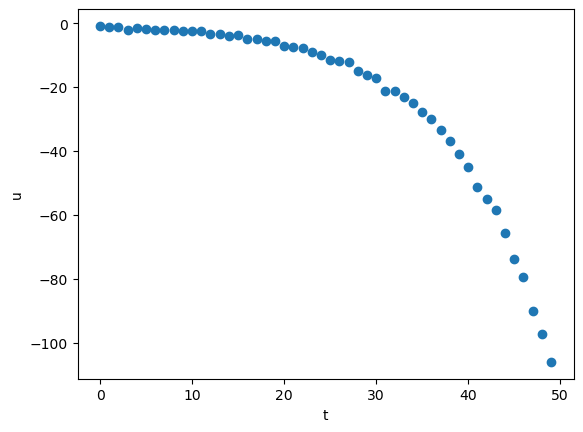

In [21]:
from matplotlib import pyplot as plt
plt.scatter(list(range(50)), x)
plt.xlabel('t')
plt.ylabel('u')

Text(0, 0.5, 'x')

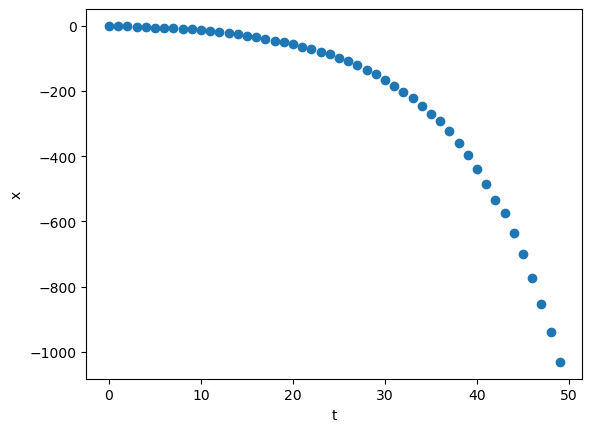

In [17]:
plt.scatter(list(range(50)), f_x(x))
plt.xlabel('t')
plt.ylabel('x')

## ex2 (10 dots)

In [4]:
def eq_x1(x2, t):
    return x2[t]

def eq_x2(x1, x2, u, N, t):
    return 2*x2[t]-x1[t]+((1/(N**2))*u[t])


def f(u):
    N = 10
    x1 = [0]
    x2 = [0]
    
    I_sum = 0
    
    for t in range(N):
        x1.append(eq_x1(x2, t))
        x2.append(eq_x2(x1, x2, u, N, t))
        
        I_sum += u[t]**2
        
    return (1/(2*N))*I_sum - x1[N]

In [5]:
def x_counter(u):
    N = 10
    x1 = [0]
    x2 = [0]
    
    I_sum = 0
    
    for t in range(N):
        x1.append(eq_x1(x2, t))
        x2.append(eq_x2(x1, x2, u, N, t))
        
        I_sum += u[t]**2
        
    return x1, x2

In [22]:
# setting paarameters
pop_size = 500
num_of_x = 10
prt = 0.4
NStep = 50
Migrations = 100
MinDist = 0.00000000001
a = [0]*50
b = [100]*50


soma = Soma(f)
x, f_x, loop, time_run = soma.find_min(pop_size = pop_size,
                                       num_of_x = num_of_x,
                                       a = a,
                                       b = b,
                                       NStep = NStep,
                                       prt = prt,
                                       Migrations = Migrations,
                                       MinDist = MinDist)



# msoma = Msoma(f)
# u, I, iterac, t = msoma.find_min(pop_size = pop_size,
#                                        num_of_x = num_of_x,
#                                        a = a,
#                                        b = b,
#                                        NStep = NStep,
#                                        prt = prt,
#                                        Migrations = Migrations,
#                                        MinDist = MinDist)
# x*, f(x*), number of loops, time = MSOMA function (population size, number of variables, constraints a, constraints b, number of steps, prt, number of migrations, minimum distance)


print("min f(x) = ", f_x)
print("loop = ", loop)
print("--- run time %s seconds ---" % time_run)

min f(x) =  -0.1425000000000005
loop =  100
--- run time 26.324079036712646 seconds ---


Text(0, 0.5, 'u')

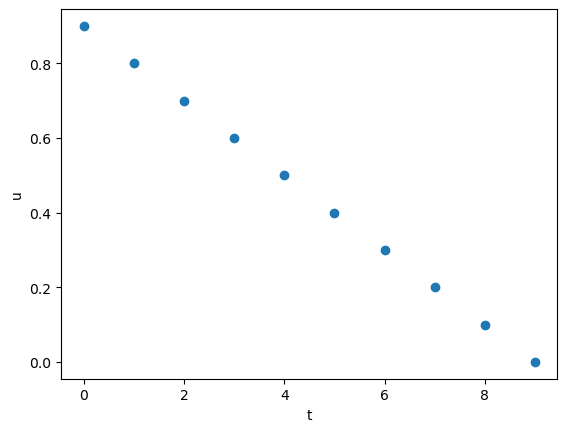

In [23]:
from matplotlib import pyplot as plt
plt.scatter([t for t in range(10)], x)
plt.xlabel('t')
plt.ylabel('u')

Text(0, 0.5, 'x1')

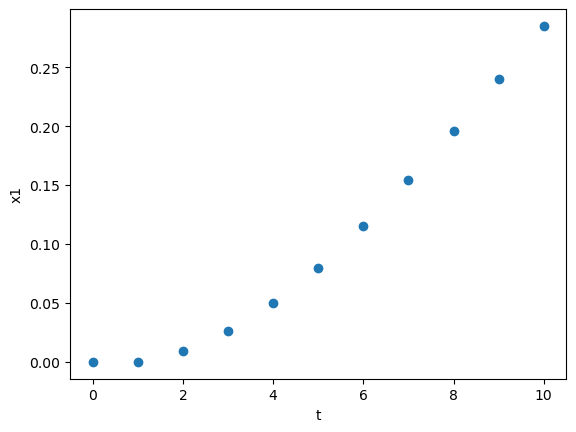

In [24]:
plt.scatter([t for t in range(11)], x_counter(x)[0])
plt.xlabel('t')
plt.ylabel('x1')

Text(0, 0.5, 'x2')

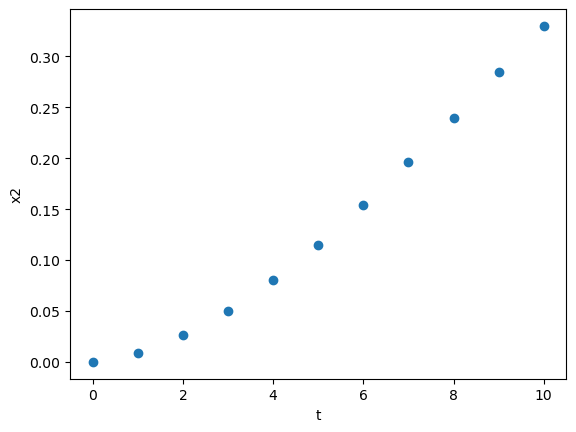

In [25]:
plt.scatter([t for t in range(11)], x_counter(x)[1])
plt.xlabel('t')
plt.ylabel('x2')

# Bundles of trajectories

In [102]:
def start_parallelepiped(start_conditions : list
                         , indent : int
                         , step : int) -> list:
    
    pre_start_conditions = []
    for el in start_conditions:
        pre_start_conditions.append([n for n in np.arange(el-(step*indent), el+(step*indent)+1, step)])
        
    if len(pre_start_conditions) == 1:
        return pre_start_conditions[0]
    
    else:  
        tmp = list(product(pre_start_conditions[0], pre_start_conditions[1]))
        if len(start_conditions) > 2:
            for i in range(2, len(start_conditions)):
                tmp = list(product(tmp, pre_start_conditions[i]))
                for ind in range(len(tmp)):
                    ff = list(tmp[ind][0])
                    ff.append(tmp[ind][1])
                    tmp[ind] = ff
        else:
            for ind in range(len(tmp)):
                tmp[ind] = list(tmp[ind])
                
        return tmp
    

In [80]:
def info_print(u, I, iterac, t):
    print(f'target function value: {I}')
    print(f'final iteration: {iterac}')
    print(f'execution time: {t}')
    print('--------------------------------')
    print(f'U: {u}')

## ex1 (50 dots)

In [141]:
#1
def model(t, x, u):
    return x[t] + u[t]


all_start_points = start_parallelepiped([0], 2, 100)


def f(u):
    N = 50
    I_sum = 0
    for point in all_start_points:
        x = [point]
        sumU = 0
        for t in range(N):
            x.append(model(t, x, u))
            sumU += (1.1**(-t)) * (u[t]**2)
        I_sum += 0.5*(sumU) + x[N]
        
    I_sum /= len(all_start_points)
    return I_sum 


In [142]:
def f_x(u):
    N = 50
    I_sum = 0
    
    for point in all_start_points:
        x = [point]
        sumU = 0
        for t in range(N):
            x.append(model(t, x, u))
            sumU += (1.1**(-t)) * (u[t]**2)
        I_sum += 0.5*(sumU) + x[N]
        plt.scatter([t for t in range(51)], x, linewidth = 0.1)
        
    I_sum /= len(all_start_points)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    return I_sum 

### SOMA

In [69]:
soma = Soma(f)
u, I, iterac, t = soma.find_min(pop_size = 600
                 , num_of_x = 50
                , a = [-110]*50
                , b = [0]*50
                 , NStep = 100
                 , prt = 0.4
                 , Migrations = 100
                 , MinDist = 0.1**5)


In [74]:
info_print(u, I, iterac, t)

target: -581.8247710251362
iter: 100
time: 520.5289258956909


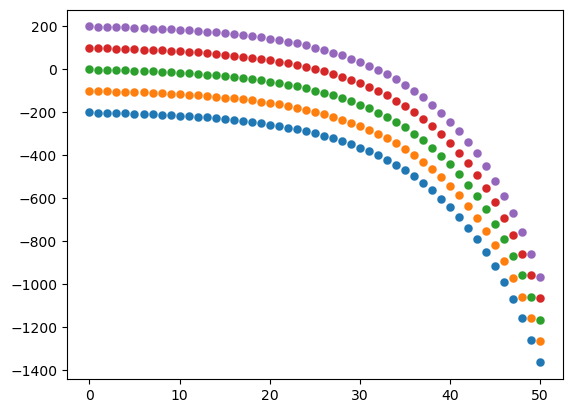

-581.8247710251362

In [72]:
f_x(u)

Text(0, 0.5, 'u')

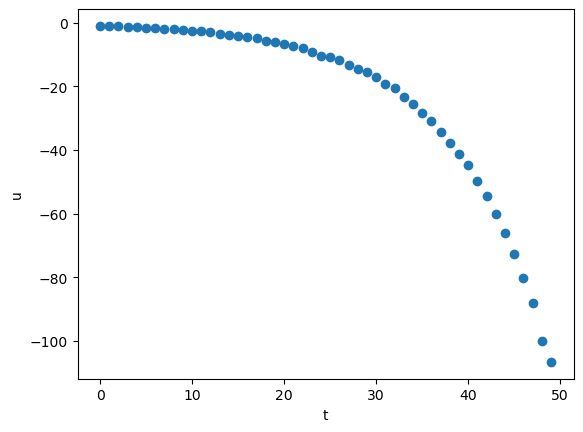

In [73]:
plt.scatter(list(range(50)), u)
plt.xlabel('t')
plt.ylabel('u')

### MSOMA

In [143]:
msoma = Msoma(f)
u, I, iterac, t = msoma.find_min(pop_size = 600
                 , num_of_x = 50
                , a = [-110]*50
                , b = [0]*50
                 , NStep = 40
                 , prt = 0.3
                 , Migrations = 50
                 , MinDist = 0.1**10)

In [148]:
info_print(u, -553.3341, 19, 2523.330262999271)

target function value: -553.3341
final iteration: 19
execution time: 2523.330262999271
--------------------------------
U: [  0.          -3.69759668  -1.8165702   -2.24625741  -2.99919841
  -2.09590898  -0.51538814  -0.46757877  -3.75488011  -1.96983561
  -0.23814931  -3.80777885  -4.46263792  -3.17408554  -5.95635532
  -6.72169467  -8.26147325  -4.78044155  -4.50277957  -6.96114625
  -8.56351746  -6.60174825 -10.3746736   -7.09031875 -11.12156943
 -11.68212002  -9.77695813 -18.79100268 -12.45924727 -22.68833179
 -15.85901326 -25.20736948 -26.16179595 -23.9839223  -32.75987206
 -31.82841369 -34.19524922 -42.15516945 -32.47016783 -59.15495506
 -57.44915828 -47.73595569 -57.68504982 -50.06769757 -73.48141502
 -65.55338296 -78.73851533 -85.60952212 -80.6945899  -96.70423054]


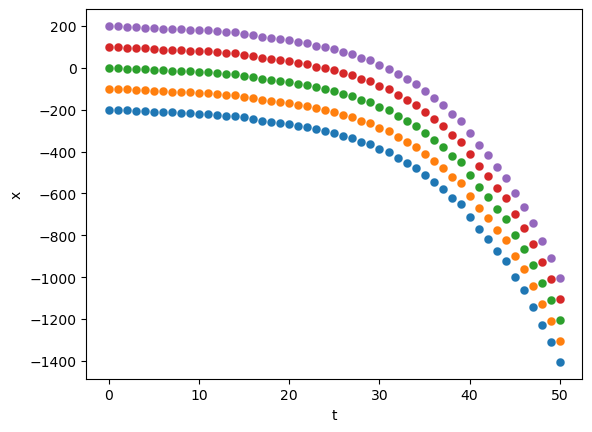

-553.3341416428646

In [145]:
f_x(u)

Text(0, 0.5, 'u')

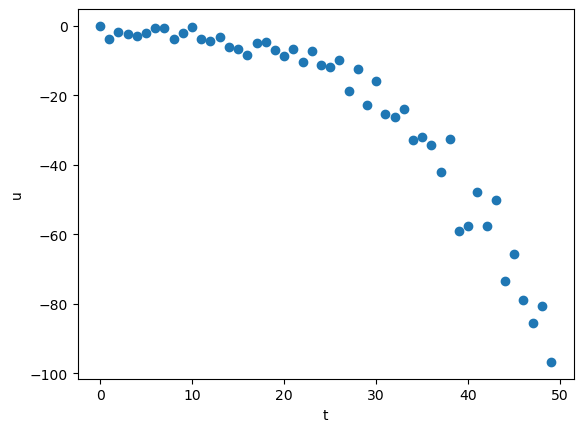

In [146]:
plt.scatter(list(range(50)), u)
plt.xlabel('t')
plt.ylabel('u')

## ex2 (10 dots)

In [149]:
#2
def eq_x1(x2, t):
    return x2[t]

def eq_x2(x1, x2, u, N, t):
    return 2*x2[t]-x1[t]+((1/(N**2))*u[t])

all_start_points = start_parallelepiped([0, 0], 2, 0.2)


def f(u): 
    N = 10
    I_sum = 0
    
    for point in all_start_points:
        x1 = [point[0]]
        x2 = [point[1]]
    
        sum_U = 0
    
        for t in range(N):
            x1.append(eq_x1(x2, t))
            x2.append(eq_x2(x1, x2, u, N, t))

            sum_U += u[t]**2
        I_sum += (1/(2*N))*sum_U - x1[N]
        
    I_sum /= len(all_start_points)
    return I_sum

In [150]:
def f_x1(u): 
    N = 10
    I_sum = 0
    
    for point in all_start_points:
        x1 = [point[0]]
        x2 = [point[1]]
    
        sum_U = 0
    
        for t in range(N):
            x1.append(eq_x1(x2, t))
            x2.append(eq_x2(x1, x2, u, N, t))

            sum_U += u[t]**2
        I_sum += (1/(2*N))*sum_U - x1[N]
        plt.scatter([t for t in range(N+1)], x1, linewidth = 0.1)
        
    I_sum /= len(all_start_points)
    plt.xlabel('t')
    plt.ylabel('x1')
    plt.show()

def f_x2(u): 
    N = 10
    I_sum = 0
    
    for point in all_start_points:
        x1 = [point[0]]
        x2 = [point[1]]
    
        sum_U = 0
    
        for t in range(N):
            x1.append(eq_x1(x2, t))
            x2.append(eq_x2(x1, x2, u, N, t))

            sum_U += u[t]**2
        I_sum += (1/(2*N))*sum_U - x1[N]
        plt.scatter([t for t in range(N+1)], x2, linewidth = 0.1)
        
    I_sum /= len(all_start_points)
    plt.xlabel('t')
    plt.ylabel('x2')
    plt.show()

def show_x(u):
    f_x1(u)
    f_x2(u)

### SOMA

In [137]:
soma = Soma(f)
u, I, iterac, t = soma.find_min(pop_size = 300
                 , num_of_x = 10
                , a = [0]*50
                , b = [100]*50
                 , NStep = 50
                 , prt = 0.4
                 , Migrations = 50
                 , MinDist = 0.1**5)


In [138]:
info_print(u, I, iterac, t)

target function value: -0.5424999988097853
final iteration: 27
execution time: 225.5800199508667
--------------------------------
U: [8.99909325e-01 7.99987827e-01 7.00020338e-01 5.99970658e-01
 5.00044771e-01 3.99970030e-01 3.00103373e-01 2.00005699e-01
 1.00021063e-01 9.73545827e-06]


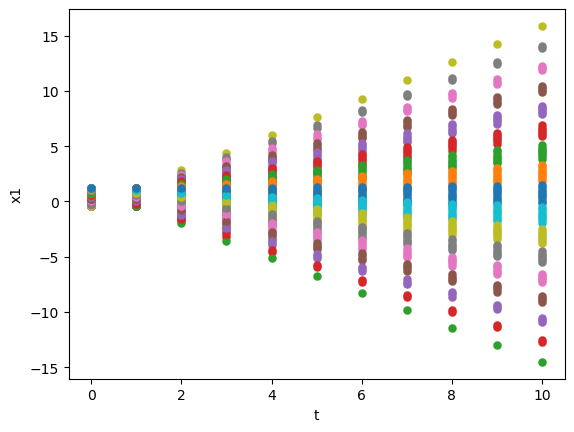

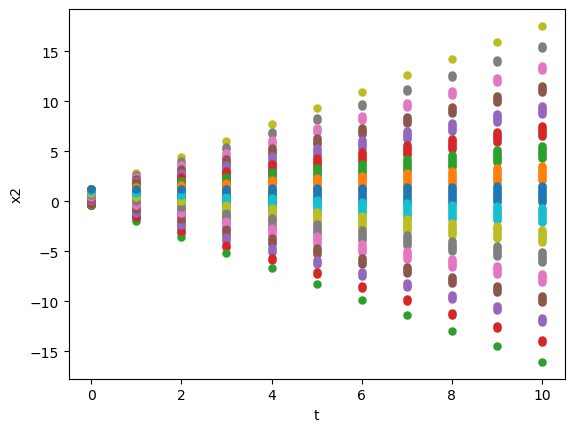

In [139]:
show_x(u)

Text(0, 0.5, 'u')

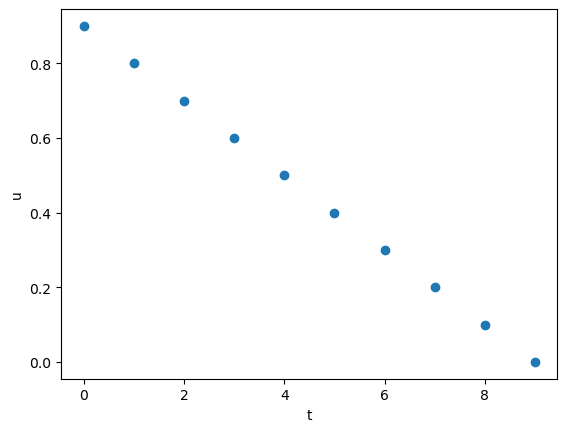

In [140]:
plt.scatter([t for t in range(10)], u)
plt.xlabel('t')
plt.ylabel('u')

### MSOMA

In [151]:
msoma = Msoma(f)
u, I, iterac, t = msoma.find_min(pop_size = 400
                 , num_of_x = 10
                , a = [0]*50
                , b = [100]*50
                 , NStep = 40
                 , prt = 0.3
                 , Migrations = 50
                 , MinDist = 0.1**5)

In [152]:
info_print(u, I, iterac, t)

target function value: -0.5424745548007707
final iteration: 14
execution time: 868.348531961441
--------------------------------
U: [0.90943877 0.80465411 0.71111912 0.59681182 0.49432263 0.3868026
 0.30740015 0.19853583 0.09897847 0.        ]


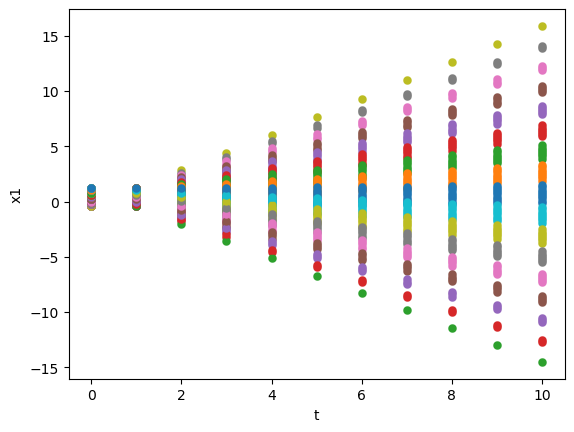

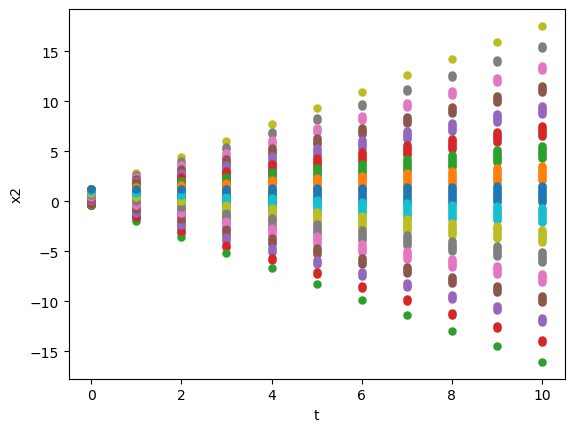

In [153]:
show_x(u)

Text(0, 0.5, 'u')

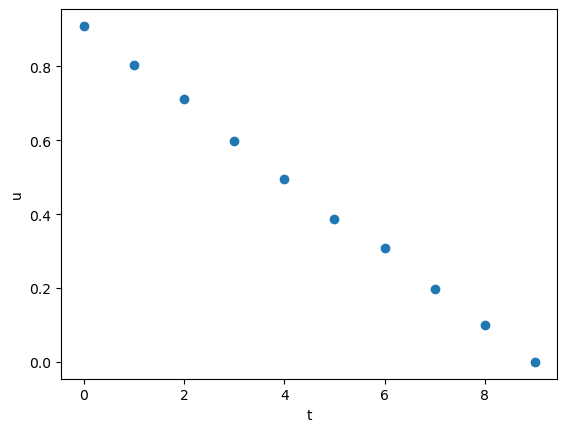

In [154]:
plt.scatter([t for t in range(10)], u)
plt.xlabel('t')
plt.ylabel('u')

# Stochastic systems

In [7]:
test_rand = pd.DataFrame()

In [8]:
rand_list = []
for _ in range(10000):
    rand_list.append(20*np.random.normal(loc=0.0, scale=1.0))
    
test_rand['test'] = rand_list

<AxesSubplot: >

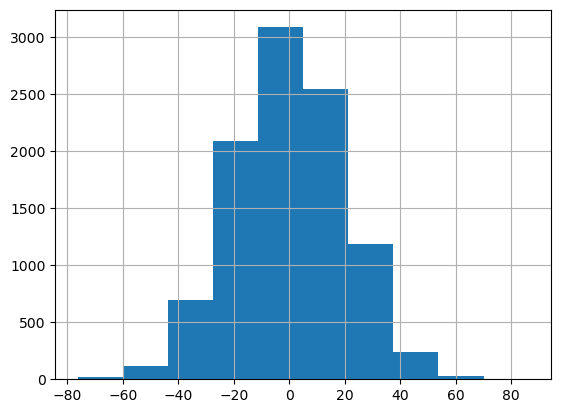

In [9]:
test_rand['test'].hist()

In [5]:
def start_parallelepiped(start_conditions : list
                         , indent : int
                         , step : int) -> list:
    
    pre_start_conditions = []
    for el in start_conditions:
        pre_start_conditions.append([n for n in np.arange(el-(step*indent), el+(step*indent)+1, step)])
        
    if len(pre_start_conditions) == 1:
        return pre_start_conditions[0]
    
    else:  
        tmp = list(product(pre_start_conditions[0], pre_start_conditions[1]))
        if len(start_conditions) > 2:
            for i in range(2, len(start_conditions)):
                tmp = list(product(tmp, pre_start_conditions[i]))
                for ind in range(len(tmp)):
                    ff = list(tmp[ind][0])
                    ff.append(tmp[ind][1])
                    tmp[ind] = ff
        else:
            for ind in range(len(tmp)):
                tmp[ind] = list(tmp[ind])
                
        return tmp

In [6]:
def info_print(u, I, iterac, t):
    print(f'target function value: {I}')
    print(f'final iteration: {iterac}')
    print(f'execution time: {t}')
    print('--------------------------------')
    print(f'U: {u}')

## ex1 (50 dots)

In [9]:

def model(t, x, u):
    return x[t] + u[t] + (20 * np.random.normal(loc=0.0, scale=1.0))


all_start_points = start_parallelepiped([0], 2, 100)


def f(u):
    N = 50
    I_sum = 0
    for point in all_start_points:
        x = [point]
        sumU = 0
        for t in range(N):
            x.append(model(t, x, u))
            sumU += (1.1**(-t)) * (u[t]**2)
        I_sum += 0.5*(sumU) + x[N]
        
    I_sum /= len(all_start_points)
    return I_sum 

In [10]:
def f_x(u):
    N = 50
    I_sum = 0
    
    for point in all_start_points:
        x = [point]
        sumU = 0
        for t in range(N):
            x.append(model(t, x, u))
            sumU += (1.1**(-t)) * (u[t]**2)
        I_sum += 0.5*(sumU) + x[N]
        plt.scatter([t for t in range(51)], x, linewidth = 0.1)
        
    I_sum /= len(all_start_points)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    return I_sum 

### SOMA

In [ ]:
soma = Soma(f)
u, I, iterac, t = soma.find_min(pop_size = 1500
                 , num_of_x = 50
                , a = [-110]*50
                , b = [0]*50
                 , NStep = 100
            
                                , prt = 0.4
                 , Migrations = 100
                 , MinDist = 0.1**5)

In [44]:
info_print(u, I, iterac, t)

target function value: -428.0443840757747
final iteration: 100
execution time: 3173.59712100029
--------------------------------
U: [-1.43797455e+00 -9.33943173e-01 -2.77872423e+00 -1.90836168e-03
 -2.76620573e+00 -1.30188623e+00 -1.95762587e+00 -4.07505561e+00
 -5.94662191e-04 -4.58038130e+00 -2.94485270e+00 -8.98347760e-01
 -1.20437360e-03 -5.88439446e+00 -6.54477234e-01 -1.45870248e-05
 -9.01739672e+00 -1.51294035e-01 -1.40869736e+01 -1.78771084e+01
 -2.52992732e+00 -8.59201695e+00 -9.44965597e+00 -4.51459358e-04
 -1.43033055e+01 -1.32709939e-01 -3.08817105e+01 -1.63368826e+01
 -1.84266040e+01 -5.03659456e-02 -2.21114915e+01 -1.21651462e+01
 -1.76229187e+01 -3.42318501e+01 -2.60940511e+01 -2.20395824e+01
 -2.05916119e+01 -2.84085831e+01 -3.16703344e+01 -9.31971741e+01
 -2.30466300e-01 -5.87243841e+01 -2.69874014e+01 -5.07859982e+01
 -5.20466149e+01 -4.89474765e+01 -6.48883306e+01 -1.96838578e+01
 -7.46950728e+01 -9.07338228e+01]


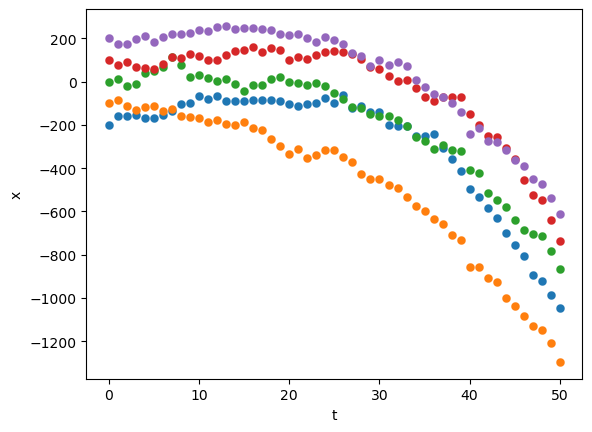

-345.3260659446342

In [45]:
f_x(u)

Text(0, 0.5, 'u')

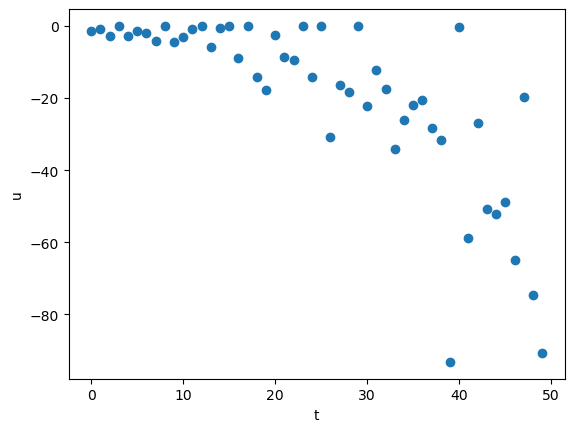

In [46]:
plt.scatter(list(range(50)), u)
plt.xlabel('t')
plt.ylabel('u')

### MSOMA

In [31]:
msoma = Msoma(f)
u, I, iterac, t = msoma.find_min(pop_size = 600
                 , num_of_x = 50
                , a = [-110]*50
                , b = [0]*50
                 , NStep = 40
                 , prt = 0.3
                 , Migrations = 50
                 , MinDist = 0.1**10)

100%|███████████████████████████████████████████| 50/50 [30:03<00:00, 36.06s/it]


In [32]:
info_print(u, I, iterac, t)

target function value: -583.9370317480074
final iteration: 50
execution time: 1803.5392441749573
--------------------------------
U: [ -3.0883004   -1.39553645  -1.97236609  -5.43609701  -5.07477029
  -0.58664172   0.15147878  -4.79907938  -6.49167647  -4.93282996
  -5.41228319  -3.4353857   -4.51682063  -3.96412566  -3.11575534
  -9.98754594  -6.82329625 -13.89035356  -9.4460306  -12.46885513
  -9.00476655  -5.31665373  -7.6126076   -9.97378237 -18.18233345
 -12.95627603 -13.92444372 -20.03301022 -17.14299848 -35.31002019
 -21.5251251  -35.31402477 -19.81487601 -24.82519341 -18.40832717
 -17.68720838  20.35082819 -32.46563832 -34.37856924 -41.0467233
 -53.61940448 -66.48037022 -56.42212593 -70.28632029 -93.35043661
 -51.14271206 -83.59603678 -48.27566975 -87.09812389 -53.60101794]


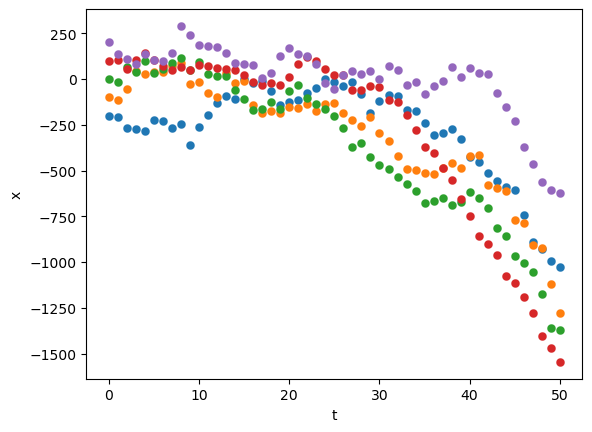

-457.0743380297311

In [33]:
f_x(u)

Text(0, 0.5, 'u')

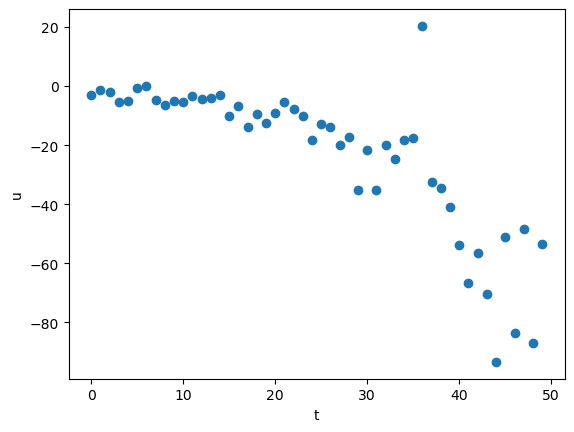

In [34]:
plt.scatter(list(range(50)), u)
plt.xlabel('t')
plt.ylabel('u')

## ex2 (10 dots)

In [17]:

def eq_x1(x2, t):
    return x2[t] + (0 *np.random.normal(loc=0.0, scale=1.0))

def eq_x2(x1, x2, u, N, t):
    return 2*x2[t]-x1[t]+((1/(N**2))*u[t]) + (0 *np.random.normal(loc=0.0, scale=1.0))

all_start_points = start_parallelepiped([0, 0], 2, 0.2)


def f(u): 
    N = 10
    I_sum = 0
    
    for point in all_start_points:
        x1 = [point[0]]
        x2 = [point[1]]
    
        sum_U = 0
    
        for t in range(N):
            x1.append(eq_x1(x2, t))
            x2.append(eq_x2(x1, x2, u, N, t))

            sum_U += u[t]**2
        I_sum += (1/(2*N))*sum_U - x1[N]
        
    I_sum /= len(all_start_points)
    return I_sum

In [18]:
def f_x1(u): 
    N = 10
    I_sum = 0
    
    for point in all_start_points:
        x1 = [point[0]]
        x2 = [point[1]]
    
        sum_U = 0
    
        for t in range(N):
            x1.append(eq_x1(x2, t))
            x2.append(eq_x2(x1, x2, u, N, t))

            sum_U += u[t]**2
        I_sum += (1/(2*N))*sum_U - x1[N]
        plt.scatter([t for t in range(N+1)], x1, linewidth = 0.1)
        
    I_sum /= len(all_start_points)
    plt.xlabel('t')
    plt.ylabel('x1')
    plt.show()

def f_x2(u): 
    N = 10
    I_sum = 0
    
    for point in all_start_points:
        x1 = [point[0]]
        x2 = [point[1]]
    
        sum_U = 0
    
        for t in range(N):
            x1.append(eq_x1(x2, t))
            x2.append(eq_x2(x1, x2, u, N, t))

            sum_U += u[t]**2
        I_sum += (1/(2*N))*sum_U - x1[N]
        plt.scatter([t for t in range(N+1)], x2, linewidth = 0.1)
        
    I_sum /= len(all_start_points)
    plt.xlabel('t')
    plt.ylabel('x2')
    plt.show()

def show_x(u):
    f_x1(u)
    f_x2(u)

### SOMA

In [19]:
soma = Soma(f)
u, I, iterac, t = soma.find_min(pop_size = 300
                 , num_of_x = 10
                , a = [0]*50
                , b = [100]*50
                 , NStep = 20
                 , prt = 0.3
                 , Migrations = 100
                 , MinDist = 0.1**5)

 35%|██████████████▋                           | 35/100 [04:49<08:57,  8.27s/it]


In [20]:
info_print(u, I, iterac, t)

target function value: -0.5424999972023219
final iteration: 35
execution time: 289.9875509738922
--------------------------------
U: [0.89989331 0.80006371 0.70009257 0.59999257 0.49994338 0.39990961
 0.29999732 0.200069   0.10012547 0.        ]


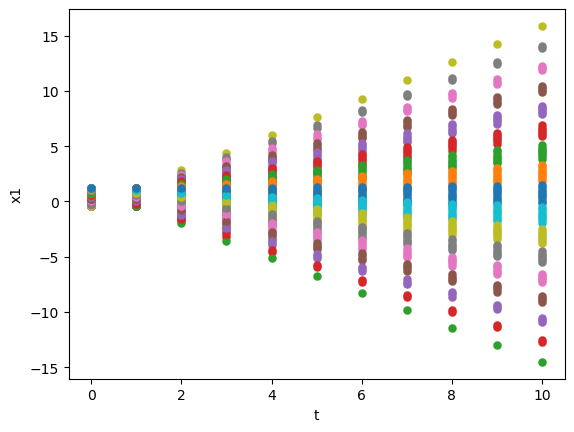

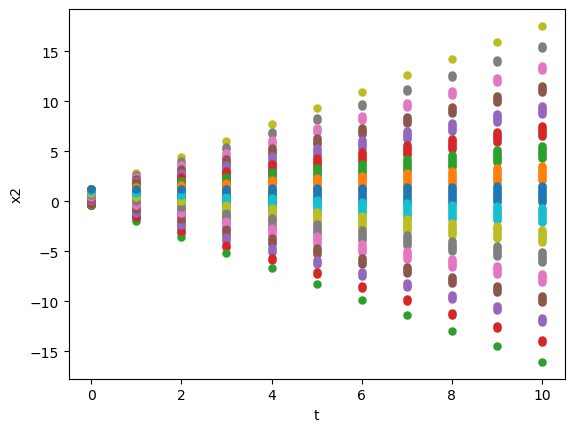

In [21]:
show_x(u)

Text(0, 0.5, 'u')

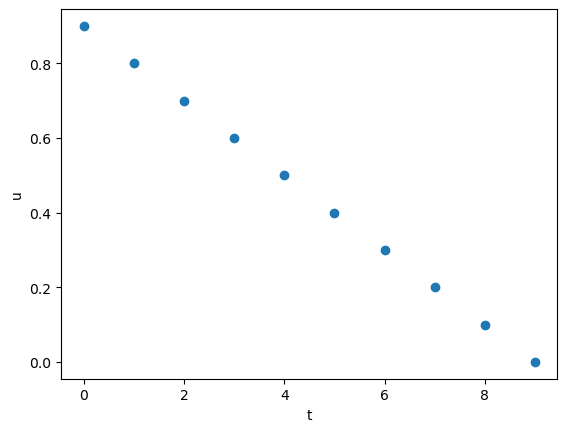

In [22]:
plt.scatter([t for t in range(10)], u)
plt.xlabel('t')
plt.ylabel('u')

### MSOMA

In [13]:
msoma = Msoma(f)
u, I, iterac, t = msoma.find_min(pop_size = 600
                 , num_of_x = 10
                , a = [0]*50
                , b = [100]*50
                 , NStep = 50
                 , prt = 0.3
                 , Migrations = 50
                 , MinDist = 0.1**5)

100%|████████████████████████████████████████| 50/50 [3:57:47<00:00, 285.35s/it]


In [14]:
info_print(u, I, iterac, t)

target function value: -0.527295296270643
final iteration: 50
execution time: 14270.38245010376
--------------------------------
U: [0.90968184 0.7251045  0.70847773 0.71064074 0.43375787 0.39085757
 0.35906478 0.26445178 0.02305616 0.        ]


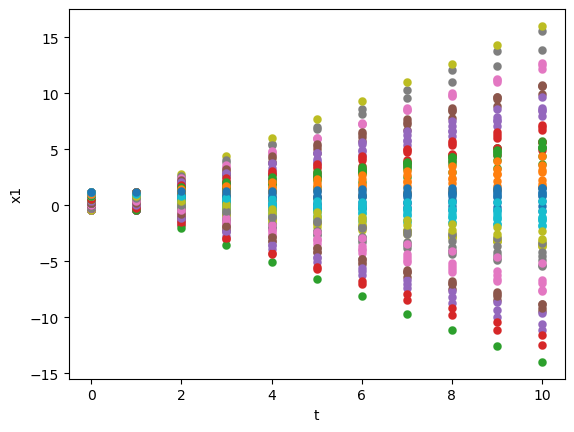

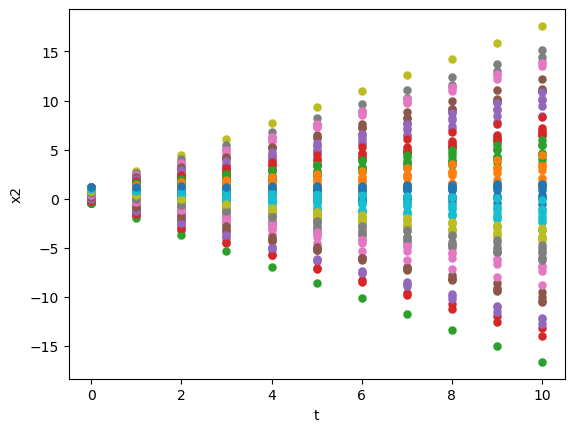

In [15]:
show_x(u)

Text(0, 0.5, 'u')

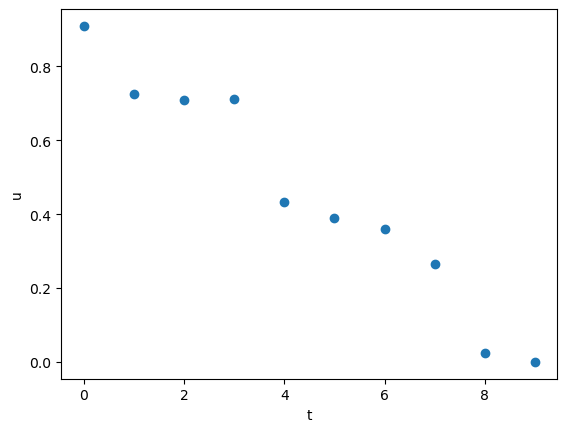

In [16]:
plt.scatter([t for t in range(10)], u)
plt.xlabel('t')
plt.ylabel('u')